# UCI中的葡萄酒质量数据集

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm

###### 选择UCI中的葡萄酒质量数据集或者自选与专业相关的数据集，采用三种以上的集成学习算法进行分类，选择你认为合适的度量指标（错误率、查准率、查全率、F1等）对这些算法和对应的弱学习器(又称基学习器)进行评估对比，选出最优模型。

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

data = load_wine()
X = data['data']
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Adaboost

AdaBoost MSE =  0.1111111111111111


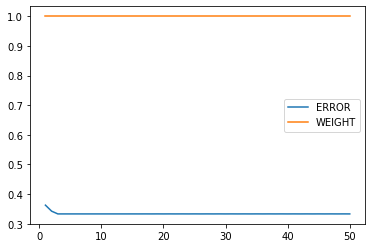

In [2]:
from sklearn.ensemble import AdaBoostClassifier

session = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    random_state=None)

session.fit(X_train, y_train)
pred_y = session.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_test, pred_y)
print("AdaBoost MSE = ", mse)

errorlist = session.estimator_errors_
weightlist = session.estimator_weights_
plt.plot(range(1, len(weightlist) + 1), errorlist, label="ERROR")
plt.plot(range(1, len(weightlist) + 1), weightlist, label="WEIGHT")
plt.legend()
plt.show()

In [3]:
score_Adaboost = [cross_val_score(session,X,y,cv=10).mean(),
                  f1_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted'),
                  accuracy_score(y_pred=session.predict(X_test),y_true=y_test),
                  recall_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted')]
print('-----------------------------------------------')
print('Adaboost:')
print('cross_val_score =',score_Adaboost[0])
print('f1_score =',score_Adaboost[1])
print('accuracy_score =',score_Adaboost[2])
print('recall_score =',score_Adaboost[3])


-----------------------------------------------
Adaboost:
cross_val_score = 0.8833333333333332
f1_score = 0.8897306397306397
accuracy_score = 0.8888888888888888
recall_score = 0.8888888888888888


#### Random Forest

When n_estimators=1, score=0.8656862745098038
When n_estimators=2, score=0.8882352941176471
When n_estimators=3, score=0.927124183006536
When n_estimators=4, score=0.9215686274509804
When n_estimators=5, score=0.9722222222222221
When n_estimators=6, score=0.9666666666666666
When n_estimators=7, score=0.9777777777777779
When n_estimators=8, score=0.9777777777777779
When n_estimators=9, score=0.9666666666666666
When n_estimators=10, score=0.9722222222222221
When n_estimators=11, score=0.9777777777777779
When n_estimators=12, score=0.9833333333333334
When n_estimators=13, score=0.9722222222222221
When n_estimators=14, score=0.9722222222222221
When n_estimators=15, score=0.9666666666666666
When n_estimators=16, score=0.9666666666666666
When n_estimators=17, score=0.9666666666666666
When n_estimators=18, score=0.9666666666666666
When n_estimators=19, score=0.9666666666666666
When n_estimators=20, score=0.9777777777777779
When n_estimators=21, score=0.9777777777777779
When n_estimators=22, s

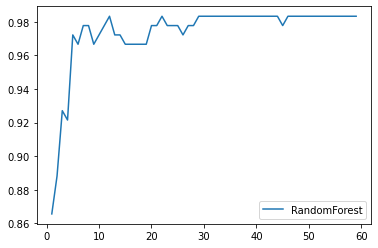

In [4]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list=[]
score_list=[]
for estimator in range(1,60):
    session = RandomForestClassifier(n_estimators=estimator, random_state=0)
    session = session.fit(X_train,y_train)
    score_list.append(cross_val_score(session,X,y,cv=10).mean())
    n_estimators_list.append(estimator)
    print('When n_estimators={}, score={}'.format(n_estimators_list[-1],score_list[-1]))


n_estimators_list=np.array(n_estimators_list)
score_list=np.array(score_list)
plt.plot(n_estimators_list,score_list,label = "RandomForest")
plt.legend()
plt.show()



In [5]:
## best param:n_estimators=12
session = RandomForestClassifier(n_estimators=25)
session.fit(X_train,y_train)
score_RF = [cross_val_score(session,X,y,cv=10).mean(),
                f1_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted'),
                accuracy_score(y_pred=session.predict(X_test),y_true=y_test),
                recall_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted')]
print('-----------------------------------------------')
print('RandomForest:')
print('cross_val_score =',score_RF[0])
print('f1_score =',score_RF[1])
print('accuracy_score =',score_RF[2])
print('recall_score =',score_RF[3])

-----------------------------------------------
RandomForest:
cross_val_score = 0.9777777777777779
f1_score = 0.9626227390180879
accuracy_score = 0.9629629629629629
recall_score = 0.9629629629629629


#### GBDT

When n_estimators=50, train_MSE=0.0, test_MSE=0.0185,CVS=0.916
When n_estimators=100, train_MSE=0.0, test_MSE=0.0185,CVS=0.9216
When n_estimators=150, train_MSE=0.0, test_MSE=0.0185,CVS=0.9105
When n_estimators=200, train_MSE=0.0, test_MSE=0.0185,CVS=0.9216
When n_estimators=250, train_MSE=0.0, test_MSE=0.0185,CVS=0.9049
When n_estimators=300, train_MSE=0.0, test_MSE=0.037,CVS=0.9327
When n_estimators=350, train_MSE=0.0, test_MSE=0.0556,CVS=0.9556
When n_estimators=400, train_MSE=0.0, test_MSE=0.0556,CVS=0.933
When n_estimators=450, train_MSE=0.0, test_MSE=0.037,CVS=0.9386
When n_estimators=500, train_MSE=0.0, test_MSE=0.037,CVS=0.95
When n_estimators=550, train_MSE=0.0, test_MSE=0.0556,CVS=0.95
When n_estimators=600, train_MSE=0.0, test_MSE=0.0185,CVS=0.95
When n_estimators=650, train_MSE=0.0, test_MSE=0.0556,CVS=0.9444
When n_estimators=700, train_MSE=0.0, test_MSE=0.0185,CVS=0.9556
When n_estimators=750, train_MSE=0.0, test_MSE=0.0185,CVS=0.9444
When n_estimators=800, train_MSE=0.0,

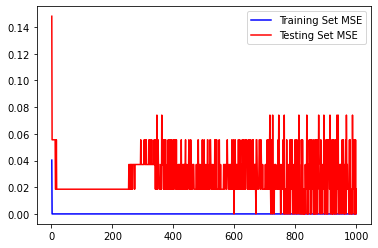

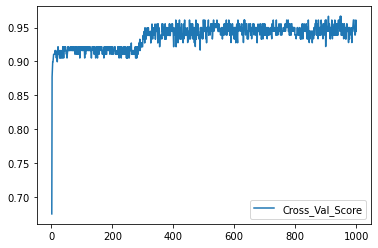

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as msef
train_score=[]
test_score=[]
CVS=[]
for i in range(1,1000+1):
    session = GradientBoostingClassifier(n_estimators=i)
    session = session.fit(X_train,y_train)
    train_score.append(msef(y_train,session.predict(X_train)))
    test_score.append(msef(y_test,session.predict(X_test)))
    CVS.append(cross_val_score(session,X,y,cv=10).mean())
    if len(train_score)%50==0:
        print("When n_estimators={}, train_MSE={}, test_MSE={},CVS={}".format(len(train_score),round(train_score[-1],4),round(test_score[-1],4),round(CVS[-1],4)))
plt.plot(np.arange(1000)+1,train_score,'b-',label = "Training Set MSE")
plt.plot(np.arange(1000)+1,test_score,'r-',label = "Testing Set MSE")

plt.legend()
plt.show()
plt.plot(np.arange(1000)+1,CVS,label = "Cross_Val_Score")
plt.legend()
plt.show()




In [8]:
print(train_score)
print(test_score)

[0.04032258064516129, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [11]:
CVS=np.array(CVS)
best_n_estimators=CVS.argsort()[::-1][0]+1
print('When n_estimators={}, \n, train_MSE={}, test_MSE={},CVS={}'.format(best_n_estimators,train_score[best_n_estimators-1],test_score[best_n_estimators-1],CVS[best_n_estimators-1]))
session = GradientBoostingClassifier(n_estimators=best_n_estimators)
session = session.fit(X_train,y_train)

score_GBDT = [cross_val_score(session,X,y,cv=10).mean(),
                f1_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted'),
                accuracy_score(y_pred=session.predict(X_test),y_true=y_test),
                recall_score(y_pred=session.predict(X_test),y_true=y_test,zero_division=0,average='weighted')]
print('-----------------------------------------------')
print('GBDT:')
print('cross_val_score =',score_GBDT[0])
print('f1_score =',score_GBDT[1])
print('accuracy_score =',score_GBDT[2])
print('recall_score =',score_GBDT[3])
print('-----------------------------------------------')

When n_estimators=950, 
, train_MSE=0.0, test_MSE=0.037037037037037035,CVS=0.9666666666666666
-----------------------------------------------
GBDT:
cross_val_score = 0.9382352941176471
f1_score = 1.0
accuracy_score = 1.0
recall_score = 1.0
-----------------------------------------------


#### 由此可知，在UCI红酒数据集上，GBDT模型的表现较好